In [1]:
# ✅ FINALIZED INSURANCE FRAUD DETECTION PIPELINE

# ----------------------------------
# STEP 1: Import Libraries
# ----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')




In [2]:
df = pd.read_csv('C:/Users/Ganesh Wagh/Downloads/insurance_claims (1).csv')
df.head()                 

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
df.shape

(1000, 40)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [10]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum().sort_values(ascending=False).head(10)


_c39                        1000
property_damage              360
police_report_available      343
collision_type               178
authorities_contacted         91
bodily_injuries                0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
dtype: int64

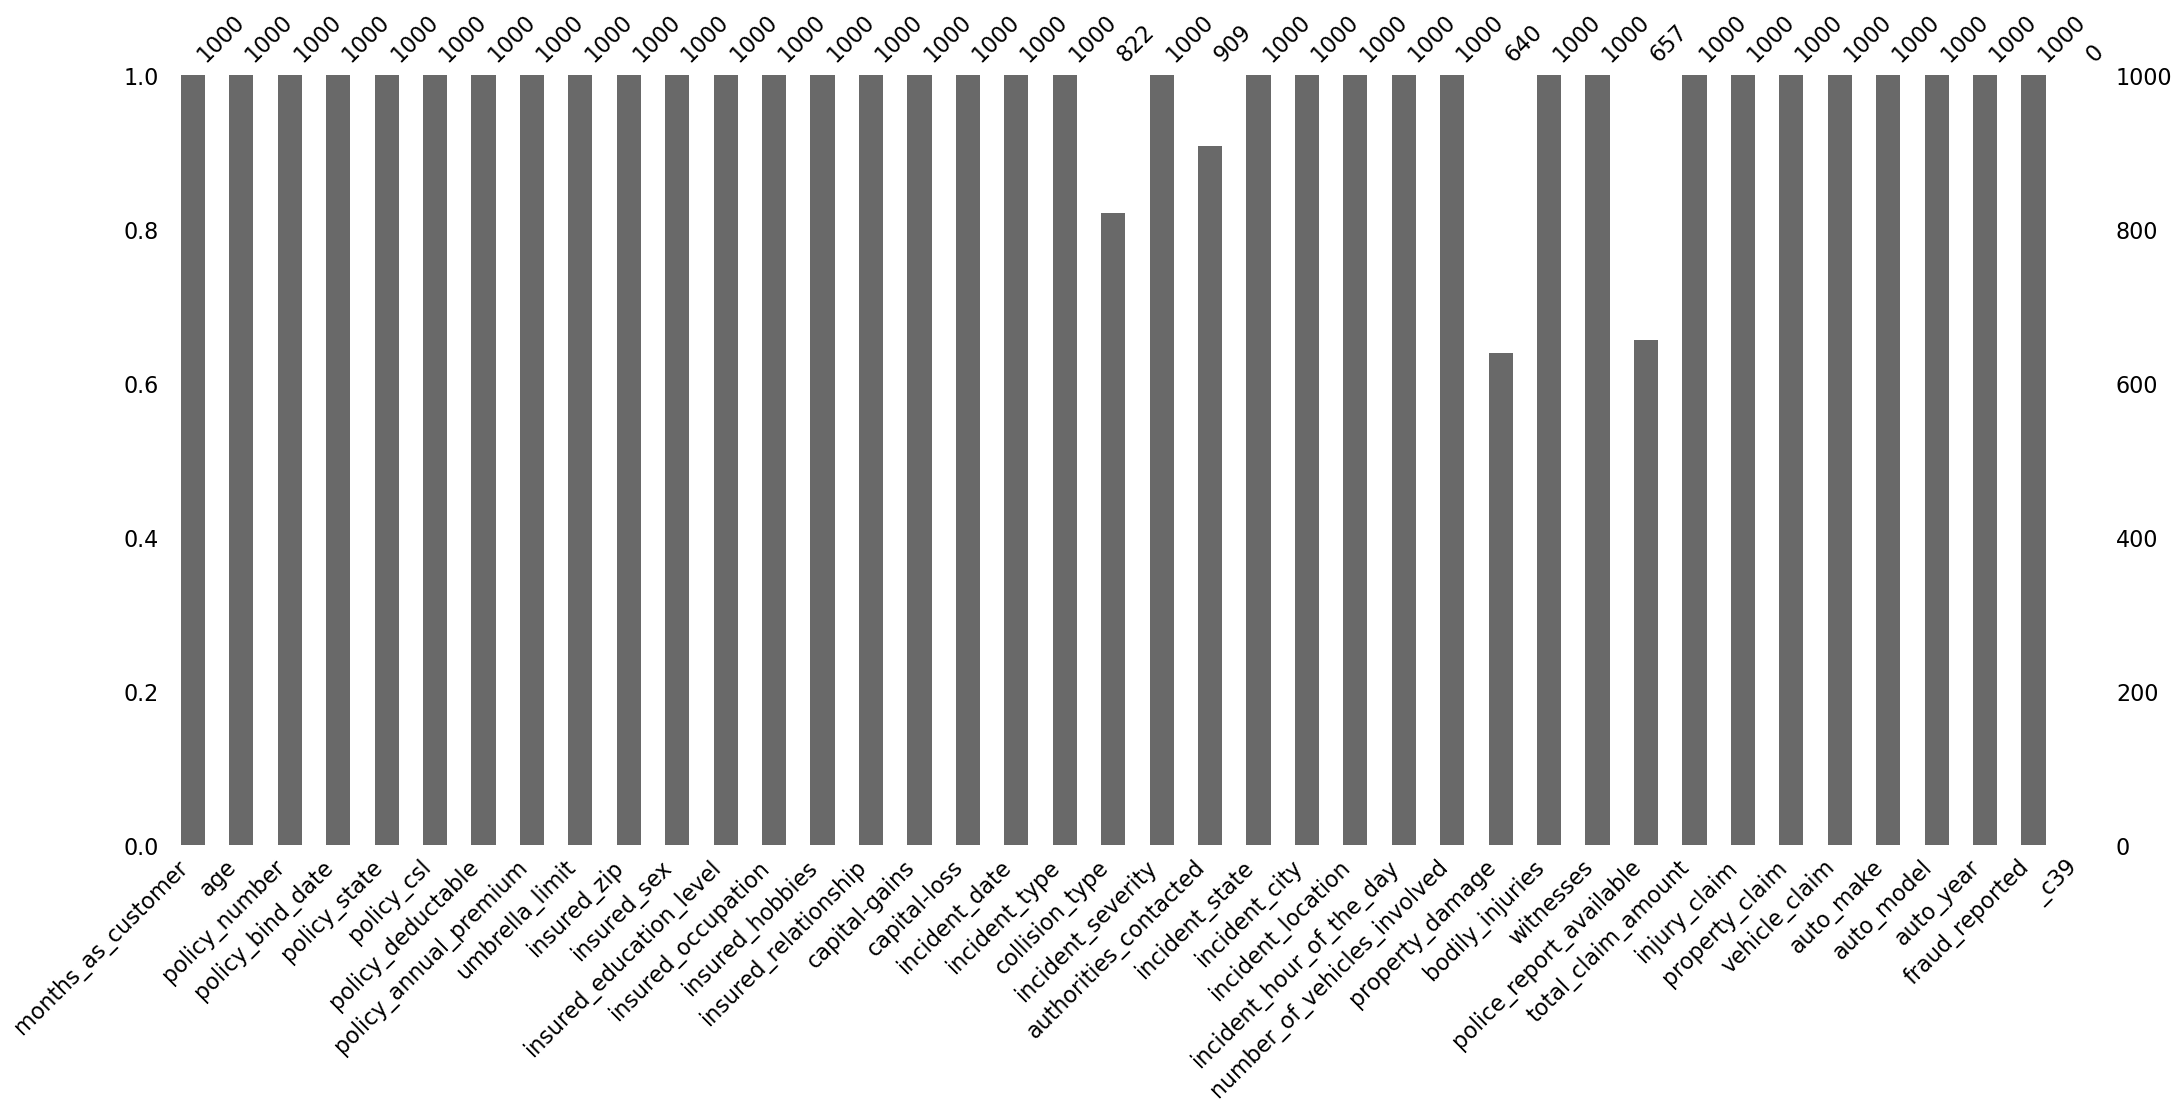

In [16]:
#Visualise the missing values

import missingno as msno

msno.bar(df)
plt.show()

In [21]:
# Handeling Missing values
# Drop only if the column '_c39' exists
if '_c39' in df.columns:
    df.drop('_c39', axis=1, inplace=True)
else:
    print("'_c39' column not found — already removed or doesn't exist.")

# filling missing values using mode
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace=True)
df['property_damage'].fillna(df['property_damage'].mode()[0], inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0], inplace=True)
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)

#rechecking
df.isnull().sum().sort_values(ascending=False).head()


'_c39' column not found — already removed or doesn't exist.


months_as_customer    0
witnesses             0
incident_state        0
incident_city         0
incident_location     0
dtype: int64

In [24]:
# Get number of unique values in each column and sort them descending
unique_counts = df.nunique().sort_values(ascending=False)

print(unique_counts)


policy_number                  1000
incident_location              1000
insured_zip                     995
policy_annual_premium           991
policy_bind_date                951
total_claim_amount              763
vehicle_claim                   726
injury_claim                    638
property_claim                  626
months_as_customer              391
capital-loss                    354
capital-gains                   338
incident_date                    60
age                              46
auto_model                       39
incident_hour_of_the_day         24
auto_year                        21
insured_hobbies                  20
insured_occupation               14
auto_make                        14
umbrella_limit                   11
insured_education_level           7
incident_state                    7
incident_city                     7
insured_relationship              6
number_of_vehicles_involved       4
authorities_contacted             4
incident_severity           

In [27]:
#droping unwanted coloumns
columns_to_drop = [
    'policy_number',         # Unique ID
    'policy_bind_date',      # Date
    'insured_zip',           # Nearly unique values
    'incident_location',     # Nearly unique values
    'incident_date',         # Date
    'incident_state',        # Already have incident_city
   'auto_model',            # 39+ models; too many categories
    'auto_year',             # Redundant with age
    'insured_hobbies'        # Not significant & 20+ values
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


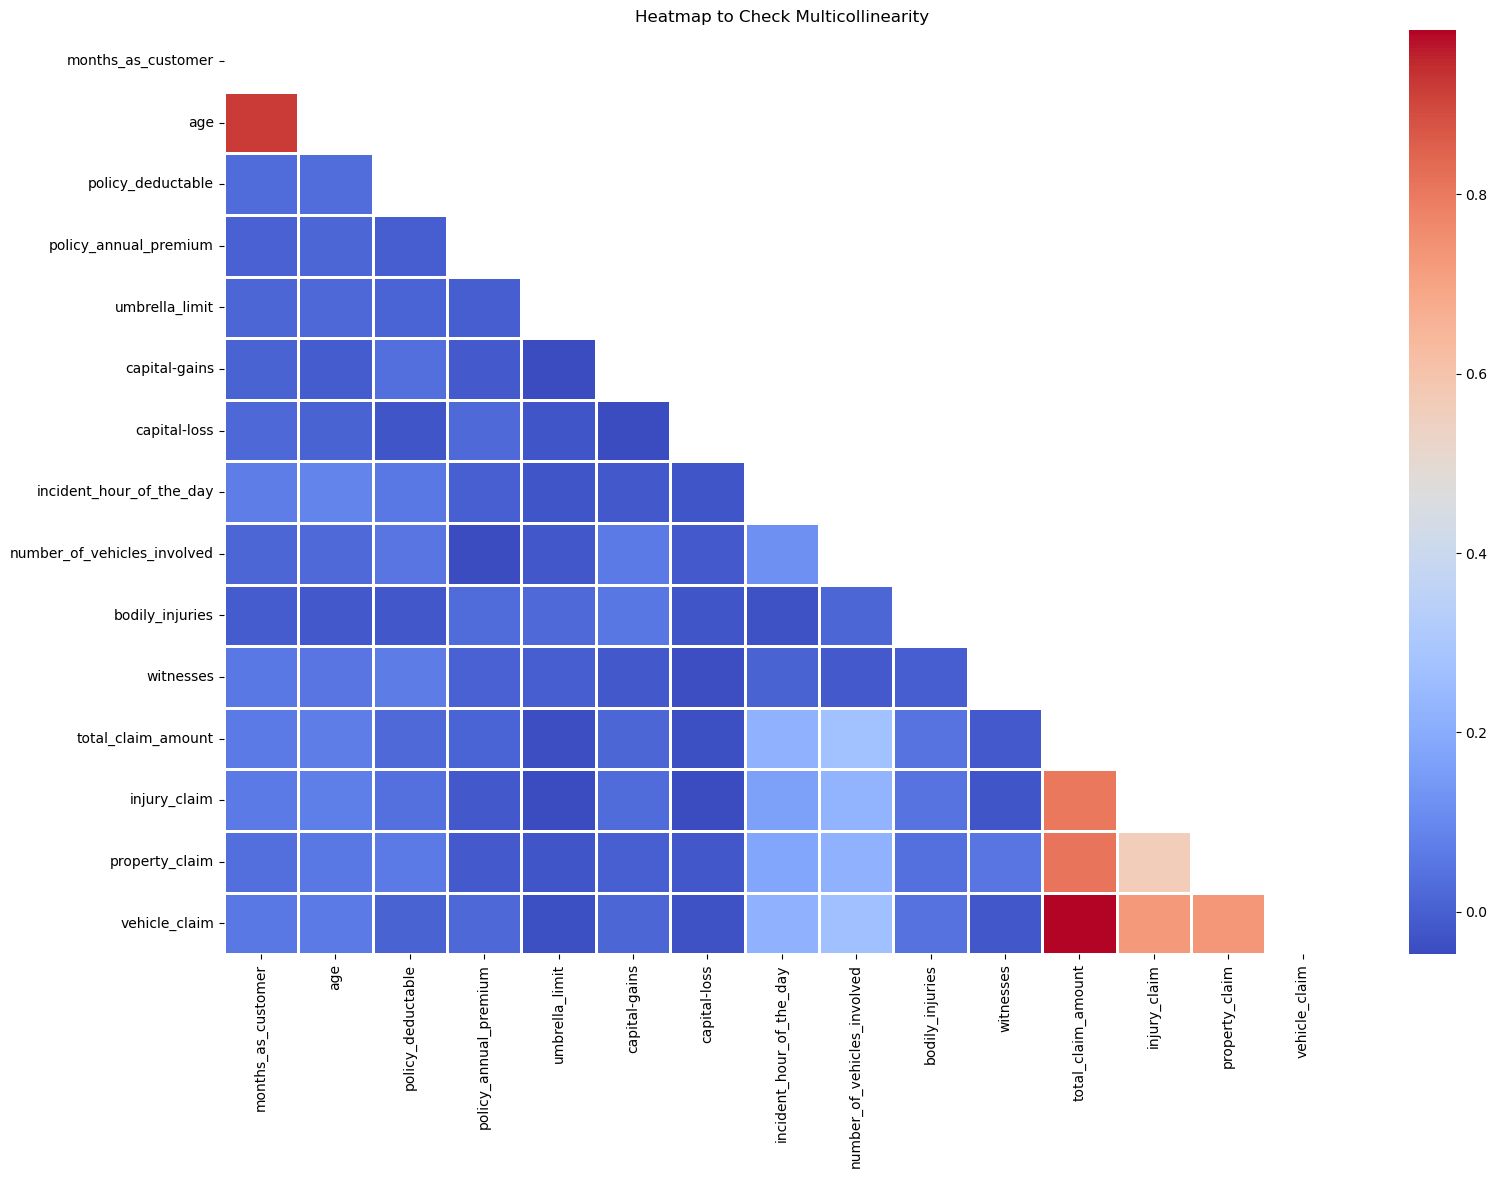

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Mask to hide upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(data=corr, mask=mask, annot=True, fmt='.2g', linewidths=1, cmap='coolwarm')
plt.title("Heatmap to Check Multicollinearity")
plt.show()



In [30]:
#droping highlly correlated variables
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [31]:
df.head()

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,6510,13020,52080,Saab,Y
1,228,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,780,780,3510,Mercedes,Y
2,134,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,7700,3850,23100,Dodge,N
3,256,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,6340,6340,50720,Chevrolet,Y
4,228,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,1300,650,4550,Accura,N


In [32]:
# Find all categorical columns (dtype = object)
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", cat_cols)


Categorical Columns: ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'fraud_reported']


In [37]:
# Apply one-hot encoding to all categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
# to convert tru/false in 1/0
df_encoded = df_encoded.astype(int)

In [38]:
print("Shape after encoding:", df_encoded.shape)
df_encoded.head()


Shape after encoding: (1000, 75)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,fraud_reported_Y
0,328,1000,1406,0,53300,0,5,1,1,2,...,0,0,0,0,0,1,0,0,0,1
1,228,2000,1197,5000000,0,0,8,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,134,2000,1413,5000000,35100,0,7,3,2,3,...,0,0,0,0,0,0,0,0,0,0
3,256,2000,1415,6000000,48900,-62400,5,1,1,2,...,0,0,0,0,0,0,0,0,0,1
4,228,1000,1583,6000000,66000,-46000,20,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Separate feature matrix (X) and target vector (y)
X = df_encoded.drop('fraud_reported_Y', axis=1)
y = df_encoded['fraud_reported_Y']

#Check Shapes
print("X shape:", X.shape)
print("y shape:", y.shape)



X shape: (1000, 74)
y shape: (1000,)


In [49]:
num_cols = [
    'months_as_customer', 'policy_deductable', 'policy_annual_premium',
    'umbrella_limit', 'capital-gains', 'capital-loss',
    'incident_hour_of_the_day', 'number_of_vehicles_involved',
    'bodily_injuries', 'witnesses', 'injury_claim',
    'property_claim', 'vehicle_claim'
]


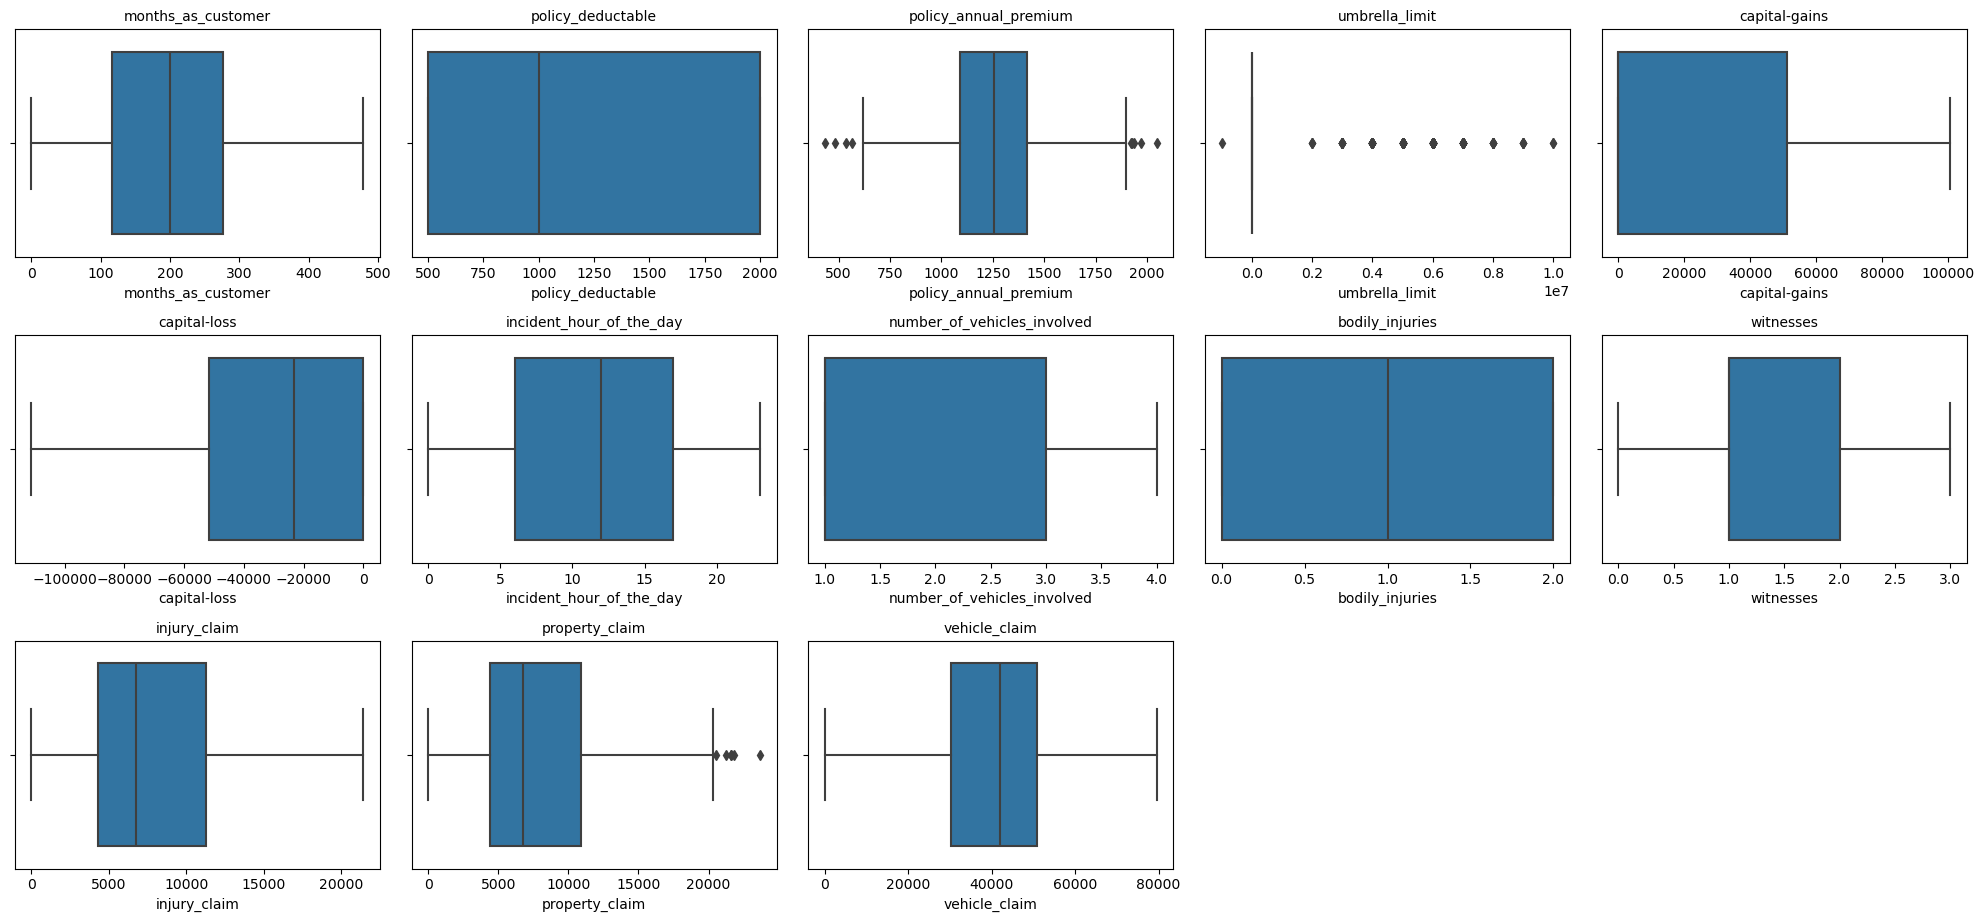

In [50]:
plt.figure(figsize=(20, 15))
plot_number = 1

for col in num_cols[:25]:  
    ax = plt.subplot(5, 5, plot_number)
    sns.boxplot(x=X[col], ax=ax)
    ax.set_title(col, fontsize=10)
    plot_number += 1

plt.tight_layout()
plt.show()


In [51]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform only the numerical columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# Optional: check scaled data
X[num_cols].head()


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,1.078140,-0.222383,0.615044,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,-0.189283,1.165505,0.749653
1,0.208995,1.412784,-0.241432,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,-1.372696,-1.823346
2,-0.608002,1.412784,0.643730,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,0.054644,-0.736072,-0.785565
3,0.452355,1.412784,0.651926,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,-0.224130,-0.219722,0.677607
4,0.208995,-0.222383,1.340386,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.257232,-1.399654,-1.768252


In [52]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [53]:
#checking the class distribution
y_train.value_counts(normalize=True)
#If one class (like fraud = 1) is < 30% of the data, it’s imbalanced and needs balancing.

fraud_reported_Y
0    0.753333
1    0.246667
Name: proportion, dtype: float64

In [54]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Balance only training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check new distribution
print(y_train_balanced.value_counts(normalize=True))


fraud_reported_Y
0    0.5
1    0.5
Name: proportion, dtype: float64


In [57]:
#  Model Training and Evaluation
#  Train and Evaluate Logistic Regression
# Initialize model
lr = LogisticRegression()

# Train on balanced data
lr.fit(X_train_balanced, y_train_balanced)

# Predict on test set (use original X_test, not balanced!)
y_pred_lr = lr.predict(X_test)

# Evaluation
print("🔍 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


🔍 Logistic Regression Results:
Accuracy: 0.792
Confusion Matrix:
 [[169  19]
 [ 33  29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       188
           1       0.60      0.47      0.53        62

    accuracy                           0.79       250
   macro avg       0.72      0.68      0.70       250
weighted avg       0.78      0.79      0.78       250



In [58]:
# Initialize model RANDOM FOREST
rf = RandomForestClassifier(random_state=42)

# Train on balanced data
rf.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluation
print("🔍 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🔍 Random Forest Results:
Accuracy: 0.756
Confusion Matrix:
 [[169  19]
 [ 42  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       188
           1       0.51      0.32      0.40        62

    accuracy                           0.76       250
   macro avg       0.66      0.61      0.62       250
weighted avg       0.73      0.76      0.74       250



In [63]:
#XGBOOST CLASSIFIER

from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_balanced, y_train_balanced)

y_pred_xgb = xgb.predict(X_test)

print("🔍 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


🔍 XGBoost Results:
Accuracy: 0.776
Confusion Matrix:
 [[165  23]
 [ 33  29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       188
           1       0.56      0.47      0.51        62

    accuracy                           0.78       250
   macro avg       0.70      0.67      0.68       250
weighted avg       0.76      0.78      0.77       250



In [66]:
#SVM

from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_balanced, y_train_balanced)

y_pred_svm = svm.predict(X_test)

print("🔍 SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


🔍 SVM Results:
Accuracy: 0.764
Confusion Matrix:
 [[180   8]
 [ 51  11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       188
           1       0.58      0.18      0.27        62

    accuracy                           0.76       250
   macro avg       0.68      0.57      0.57       250
weighted avg       0.73      0.76      0.71       250



In [67]:
#GRADIENT BOOST CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_balanced, y_train_balanced)

y_pred_gb = gb.predict(X_test)

print("🔍 Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


🔍 Gradient Boosting Results:
Accuracy: 0.8
Confusion Matrix:
 [[165  23]
 [ 27  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       188
           1       0.60      0.56      0.58        62

    accuracy                           0.80       250
   macro avg       0.73      0.72      0.73       250
weighted avg       0.80      0.80      0.80       250



In [68]:
#VOTING CLASSIFIER(ESSAMBLING 3 BEST CLASSIFIERS)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
], voting='soft')

voting.fit(X_train_balanced, y_train_balanced)

y_pred_vote = voting.predict(X_test)

print("🔍 Voting Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_vote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vote))
print("Classification Report:\n", classification_report(y_test, y_pred_vote))


🔍 Voting Classifier Results:
Accuracy: 0.788
Confusion Matrix:
 [[166  22]
 [ 31  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       188
           1       0.58      0.50      0.54        62

    accuracy                           0.79       250
   macro avg       0.71      0.69      0.70       250
weighted avg       0.78      0.79      0.78       250



Random Forest is achieving higher accuracy and recall compared to the other models, so we consider it the best model.